<a href="https://colab.research.google.com/github/juninhoisrael/juninhoisrael/blob/main/Desafio_de_inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Descritivas dos Bancos de Dados Fornecidos**

In [1]:
from google.colab import drive # Caso a leitura desse código seja feito pelo Colab, será necessário importar do drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import numpy as np               #bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
Adultos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desafio inferencia/DEMO_PHQ.csv') #Banco de dados só com adultos
criancas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desafio inferencia/PAG_HEI.csv') #Dados com adultos e crianças

In [4]:
Adultos.info() # observações do arquivo dos adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [5]:
Adultos.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [6]:
criancas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [7]:
criancas.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [8]:
combinaçao = Adultos.merge(criancas,  how = 'left', on = 'SEQN') #foi necessáario agrupar alguns dados, mas a análise em questão será direcionada aos adultos.

In [9]:
combinaçao.info() # Observaões da combinação entre os dois arquivos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

**Tratamento de Dados**

In [10]:
combinaçao.isnull().mean().round(4)*100  #observarções  dos missings

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

In [11]:
combinaçao.drop(columns=['SEQN']).describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2) # ver a distribuiçao do banco de dados com duas casas decimais.
                                                                                      # Observar algo estranho na coluna ADHERENCE. a  discrepância entre o valor máximo e o percentil 99%

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,5334.00,5334.00,5334.00,5287.00,5334.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,45.09,2.87,3.23,8.74,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,20.15,1.13,1.27,12.78,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
1%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,2.00,0.00,1.00,0.68,0.00,0.00,0.00,0.00,0.42,2.17,0.00,0.00,0.00,0.00,0.00,0.00,30.79
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,81.00,4.00,5.00,11.00,1863.05,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19


**Distribuição dos Scores Ph9**

In [12]:
combinaçao[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


In [13]:
combinaçao[['RIDRETH1']].value_counts(sort = False) #distribuição de raça 

#1 = não-hispânico
#2 = Negro não-hispânico
#3 = Mexicano-americano
#4 = Outro
#5 = Outro - Hispânico

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

In [14]:
combinaçao[['RIAGENDR']].value_counts(sort = False) #Distribuição de gênero 
#1 = Masculino
#2 = Feminino

RIAGENDR
1           2561
2           2773
dtype: int64

In [15]:
combinaçao[['DMDEDUC']].value_counts(sort = False) # distribuição de escolaridade 
#1 = Menor que 9o ano
#2 = 9-12o ano
#3 = Ensino médio
#4 = Ensino superior incompleto
#5 = Superior completo ou maior
#7 = Se recusou a responder
#9 = Não sabe

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

In [16]:
combinaçao[['INDFMINC']].value_counts(sort = False) # DISTRIBUIÇÃO DE RENDA
#1 = 0-4999
#2 - 5000-9999
#3 = 10000-14999
#4 = 15000-19999
#5 = 20000-24999
#6 = 25000-34999
#7 = 35000-44999
#8 = 45000-54999
#9 = 55000-64999
#10 = 65000-74999 
#11 = Maior ou igual a 75000
#12 = Maior que 20000
#13 = Menor que 20000
#77 = Serecusou a responder
#99 = Não sabe

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

In [17]:
combinaçao[['ADHERENCE']].value_counts(sort = False) # distribuição dos grupos de atividades físicas
#1 = Baixo (< 150min/semana)
#2 = Adequado(150-300min/semana)
#3 = Acima (> 300min/semana)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

**Tratamento de dados e decisões**

Optei por excluir as linhas com valores 7 e 9, pois por serem respostas do tipo "Não sabe ou Não quer responder" não colaboram efetivamente com a análise da depressão da amostra de estudo. Além disso, o número de pessoas que responderam dessa maneira é muito baixo para o valor total da amostra.
Também optei por trabalhar apenas com os valores de renda que indicam maior e menor que 20000,00. Para enxugar o numero de dados

In [87]:
combinaçao = combinaçao.copy()

In [18]:
drop_col = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for column in drop_col:
    combinaçao = combinaçao.loc[combinaçao[column] != 7]
    combinaçao = combinaçao.loc[combinaçao[column] != 9]

In [19]:
combinaçao['INDFMINC'] = combinaçao['INDFMINC'].astype('category')

In [21]:
combinaçao['INDFMINC']

0        4.0
1       11.0
2       11.0
3       12.0
4       11.0
        ... 
5329     3.0
5330     8.0
5331     2.0
5332     7.0
5333     6.0
Name: INDFMINC, Length: 5297, dtype: category
Categories (15, float64): [1.0, 2.0, 3.0, 4.0, ..., 12.0, 13.0, 77.0, 99.0]

In [23]:
combinaçao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5297 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SEQN                      5297 non-null   int64   
 1   DPQ010                    4799 non-null   float64 
 2   DPQ020                    4799 non-null   float64 
 3   DPQ030                    4799 non-null   float64 
 4   DPQ040                    4799 non-null   float64 
 5   DPQ050                    4799 non-null   float64 
 6   DPQ060                    4799 non-null   float64 
 7   DPQ070                    4799 non-null   float64 
 8   DPQ080                    4799 non-null   float64 
 9   DPQ090                    4799 non-null   float64 
 10  RIAGENDR                  5297 non-null   int64   
 11  RIDAGEYR                  5297 non-null   int64   
 12  RIDRETH1                  5297 non-null   int64   
 13  DMDEDUC                   5297 non-null   int64 

**Criação da variável ph9**

In [24]:
combinaçao['phq9'] = combinaçao['DPQ010'] + combinaçao['DPQ020'] + combinaçao['DPQ030'] + combinaçao['DPQ040'] + combinaçao['DPQ050'] + combinaçao['DPQ060'] + combinaçao['DPQ070'] + combinaçao['DPQ080'] + combinaçao['DPQ090']

In [25]:
combinaçao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5297 entries, 0 to 5333
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SEQN                      5297 non-null   int64   
 1   DPQ010                    4799 non-null   float64 
 2   DPQ020                    4799 non-null   float64 
 3   DPQ030                    4799 non-null   float64 
 4   DPQ040                    4799 non-null   float64 
 5   DPQ050                    4799 non-null   float64 
 6   DPQ060                    4799 non-null   float64 
 7   DPQ070                    4799 non-null   float64 
 8   DPQ080                    4799 non-null   float64 
 9   DPQ090                    4799 non-null   float64 
 10  RIAGENDR                  5297 non-null   int64   
 11  RIDAGEYR                  5297 non-null   int64   
 12  RIDRETH1                  5297 non-null   int64   
 13  DMDEDUC                   5297 non-null   int64 

**Contruindo a variável php_grp:**  Que categoriza o grau de sintomas das pessoas

In [26]:
conditionlist = [
    (combinaçao['phq9'] <= 5.1),
    (combinaçao['phq9'] > 5.1) & (combinaçao['phq9'] <= 10.2),
    (combinaçao['phq9'] > 10.2) & (combinaçao['phq9'] <= 15.3),
    (combinaçao['phq9'] > 15.3) & (combinaçao['phq9'] <= 20),
    (combinaçao['phq9'] > 20)]
values = [0, 1, 2 ,3 ,4]

combinaçao['phq_grp'] = np.select(conditionlist, values)


In [27]:
combinaçao[['phq_grp']].value_counts(sort = False) #Avaliação da frequência
# 0 = Sem Sintomas
# 1 = Sintomas Leves
# 2 = Sintomas Moderados
# 3 = Sintomas Moderadamente Severos
# 4 = Sintomas Severos

phq_grp
0          4511
1           547
2           165
3            52
4            22
dtype: int64

In [28]:
combinaçao.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0


**EDA: UNIVARIADA**

In [29]:
combinaçao.drop(columns=['SEQN']).describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
count,4799.00,4799.00,4799.00,4799.00,4799.00,4799.00,4799.00,4799.00,4799.00,5297.00,5297.00,5297.00,5297.00,5297.00,5297.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,5027.00,4799.00,5297.00
mean,0.29,0.30,0.53,0.70,0.31,0.20,0.22,0.13,0.05,1.52,44.93,2.87,3.24,473.75,1.98,3.21,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.79,6.07,6.22,49.95,2.73,0.21
std,0.65,0.65,0.87,0.87,0.69,0.55,0.59,0.45,0.27,0.50,20.07,1.13,1.27,782.30,0.92,1.47,2.14,1.95,2.17,1.92,1.60,1.01,2.17,3.23,3.42,3.50,3.17,3.33,12.32,3.73,0.58
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00,0.00
1%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,24.65,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,0.00,1.00,0.69,0.00,0.00,0.00,0.00,0.42,2.17,0.00,0.00,0.00,0.00,0.00,0.00,30.79,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,38.11,1.00,2.06,0.00,0.44,0.00,0.00,2.60,4.17,0.00,2.02,1.58,2.92,3.70,3.72,40.99,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,42.00,3.00,3.00,210.00,2.00,3.22,0.07,2.32,2.06,1.02,4.94,5.00,2.58,4.43,4.83,6.22,6.41,6.87,49.49,1.00,0.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,61.00,4.00,4.00,571.13,3.00,4.83,4.49,4.94,5.00,3.40,5.00,5.00,5.00,7.26,7.65,9.25,8.98,9.45,58.13,4.00,0.00
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,81.00,4.00,5.00,1870.67,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.20,10.00,1.00


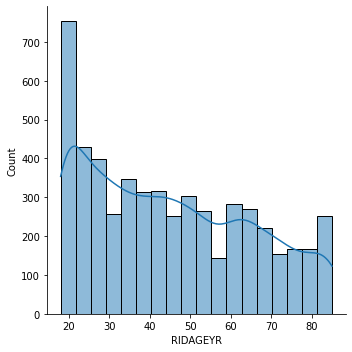

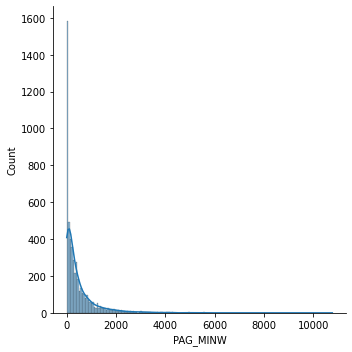

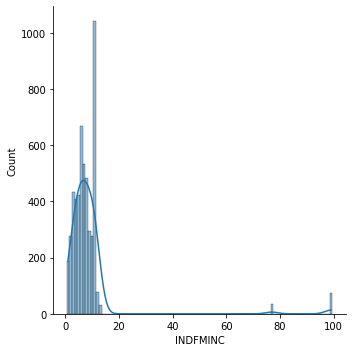

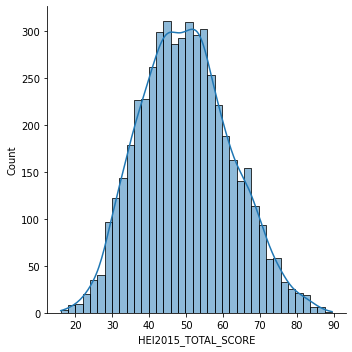

In [30]:
sns.displot(combinaçao, x = 'RIDAGEYR', kde=True)
sns.displot(combinaçao, x = 'PAG_MINW', kde=True)
sns.displot(combinaçao, x = 'INDFMINC', kde=True)
sns.displot(combinaçao, x = 'HEI2015_TOTAL_SCORE', kde=True)
plt.show()
#Plotação de histogramas das variáveis referentes a idade, tempo de atividade física, renda e score de alimentação

In [31]:
combinaçao['PAG_MINW_log'] = np.log(combinaçao['PAG_MINW'] + 1)

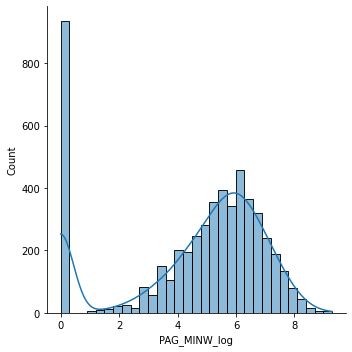

In [32]:
sns.displot(combinaçao, x = 'PAG_MINW_log', kde=True)

In [33]:
def grafico_barras(data, variable):
  (data[[variable]]
   .value_counts(normalize=True, sort = False)
   .rename('Proportion')
   .reset_index()
   .pipe((sns.barplot,'data'), x=variable, y='Proportion'))
  plt.ylim(0,1)
  plt.show()

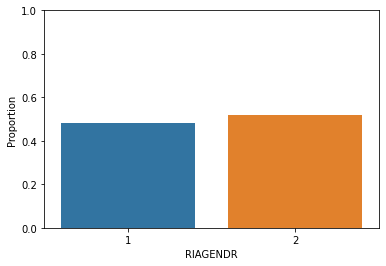

In [34]:
grafico_barras(combinaçao, variable = 'RIAGENDR')

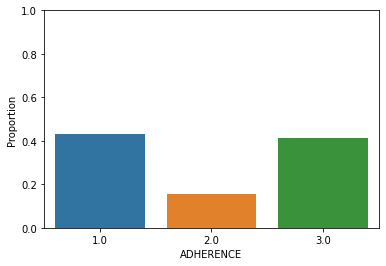

In [35]:
grafico_barras(combinaçao, variable = 'ADHERENCE')

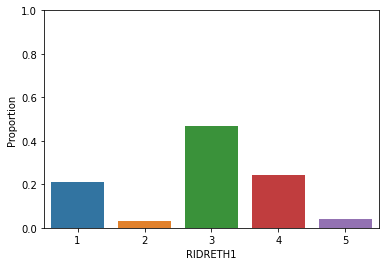

In [36]:
grafico_barras(combinaçao, variable = 'RIDRETH1')

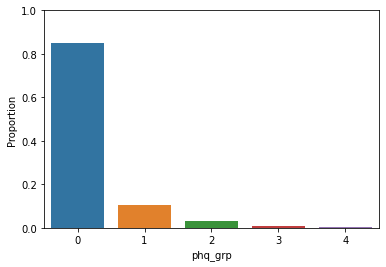

In [37]:
grafico_barras(combinaçao, variable = 'phq_grp') #proporção da severidade dos sintomas

**EDA: BIVARIADA E TESTE DE HIPÓTESE**

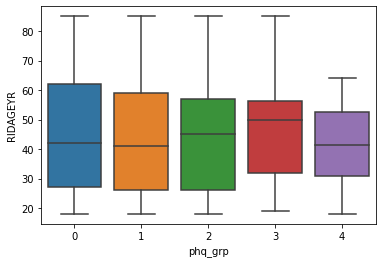

In [38]:
sns.boxplot(x="phq_grp", y="RIDAGEYR", data=combinaçao)

In [44]:
from scipy.stats import f_oneway
combinaçao_aux = combinaçao[['phq_grp', 'RIDAGEYR']].dropna()
stat, p = f_oneway(combinaçao_aux[(combinaçao_aux.phq_grp == 0)]['RIDAGEYR'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 1)]['RIDAGEYR'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 2)]['RIDAGEYR'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 3)]['RIDAGEYR'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 4)]['RIDAGEYR'])
print('stat=%.3f, p=%.3f' % (stat, p))
# Não é possível identificar grandes associaões entre sintomas de depressão é média de idade                                                              

stat=0.929, p=0.446


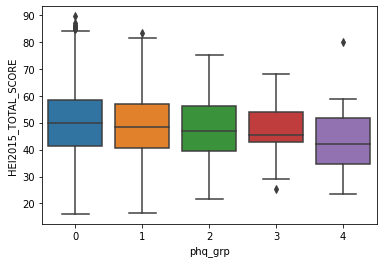

In [45]:
sns.boxplot(x="phq_grp", y="HEI2015_TOTAL_SCORE", data=combinaçao)

In [46]:
from scipy.stats import f_oneway
combinaçao_aux = combinaçao[['phq_grp', 'HEI2015_TOTAL_SCORE']].dropna()
stat, p = f_oneway(combinaçao_aux[(combinaçao_aux.phq_grp == 0)]['HEI2015_TOTAL_SCORE'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 1)]['HEI2015_TOTAL_SCORE'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 2)]['HEI2015_TOTAL_SCORE'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 3)]['HEI2015_TOTAL_SCORE'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 4)]['HEI2015_TOTAL_SCORE'])
print('stat=%.3f, p=%.3f' % (stat, p))
# É possível afirmar que a alimentação "ruim" tem alguma associação com depressão.

stat=4.396, p=0.002


KeyError: ignored

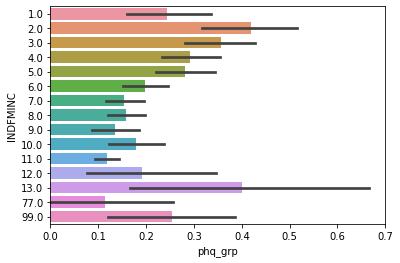

In [51]:
sns.barplot(x="phq_grp", y="INDFMINC", data=combinaçao)

In [52]:
from scipy.stats import f_oneway
combinaçao_aux = combinaçao[['phq_grp', 'INDFMINC']].dropna()
stat, p = f_oneway(combinaçao_aux[(combinaçao_aux.phq_grp == 0)]['INDFMINC'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 1)]['INDFMINC'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 2)]['INDFMINC'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 3)]['INDFMINC'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 4)]['INDFMINC'])
print('stat=%.3f, p=%.3f' % (stat, p))
# Podemos afirmar que rendas abaixo de 20000,00 tem alguma associção com quadros mais severos de depressão

stat=2.215, p=0.065


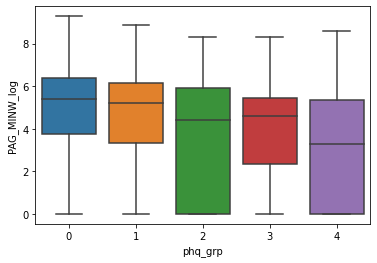

In [54]:
sns.boxplot(x="phq_grp", y="PAG_MINW_log", data=combinaçao)

In [55]:
from scipy.stats import f_oneway
combinaçao_aux = combinaçao[['phq_grp', 'PAG_MINW_log']].dropna()
stat, p = f_oneway(combinaçao_aux[(combinaçao_aux.phq_grp == 0)]['PAG_MINW_log'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 1)]['PAG_MINW_log'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 2)]['PAG_MINW_log'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 3)]['PAG_MINW_log'],
                  combinaçao_aux[(combinaçao_aux.phq_grp == 4)]['PAG_MINW_log'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=13.281, p=0.000


In [64]:
tukey = pairwise_tukeyhsd(combinaçao_aux['PAG_MINW_log'],
                          combinaçao_aux['phq_grp'],
                          alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2611 0.1276 -0.5636  0.0413  False
     0      2   -1.165  0.001 -1.6945 -0.6355   True
     0      3  -0.8804 0.0747 -1.8122  0.0513  False
     0      4  -1.4958 0.0347 -2.9236 -0.0681   True
     1      2  -0.9039  0.001 -1.4972 -0.3105   True
     1      3  -0.6193 0.4091 -1.5888  0.3502  False
     1      4  -1.2347 0.1387 -2.6874   0.218  False
     2      3   0.2846    0.9 -0.7779   1.347  False
     2      4  -0.3309    0.9 -1.8472  1.1854  False
     3      4  -0.6154 0.8444 -2.3145  1.0837  False
----------------------------------------------------


Podemos concluir que alimentação e praticas de exercicíos fisicos tem alguma relação com a falta de sintomas depressivos ou sintomas leves, assim como a falta deles estão associados com quadros mais graves. Entretando não podemos concluir que esses fatores são decisivos, por conta de alguns viéses que podem existir e não são identificados. Por exemplo: Será que as pessoas que praticam atividade não têm depressão ou são as pessoas depressivas que não têm ânimo para se exercitarem?  Pessoas que se alimentam bem não se tornam depressivas ou as pessoas depressivas comem 'mal" para buscar algum prazer momentâneo com alimentos açucarados e/ou gordurosos? 